#### **Importing libraries**

In [27]:
import torch
import torch.nn as nn

---

#### **Building a basic neural network**

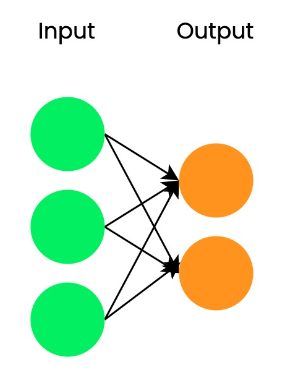

In [28]:
# Creating an input tensor containing 3 features
input_tensor = torch.tensor([[0.2344, 0.5423, -0.6342]])

# Creating a linear layer 
linear_layer = nn.Linear(in_features = 3, out_features = 2)
# A linear layer applies a linear function to the input and returns an output.
# in_features is the no. of features/nodes in the input layer.
# out_features is the no. of features/nodes in the output layer.

# Passing input to the linear layer to generate output.
output = linear_layer(input_tensor)
output

tensor([[0.1382, 0.4593]], grad_fn=<AddmmBackward0>)

`Note:` that output tensor contains `2` features, same as we mentioned in the `out_features` parameter of `nn.Linear` function

In [29]:
linear_layer.weight

Parameter containing:
tensor([[-0.0412,  0.4991,  0.2885],
        [ 0.5380, -0.2728, -0.0189]], requires_grad=True)

In [30]:
linear_layer.bias

Parameter containing:
tensor([0.0602, 0.4691], requires_grad=True)

---

#### **Stacking multiple layers with nn.Sequential()**

In [31]:
# Creating a network with 4 linear layers
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.Linear(12, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 6)
)

model

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): Linear(in_features=12, out_features=18, bias=True)
  (2): Linear(in_features=18, out_features=20, bias=True)
  (3): Linear(in_features=20, out_features=6, bias=True)
)

In [32]:
input_tensor = torch.tensor([[0.2344, 0.5423, -0.6342, 0.3456, 0.6745, 0.8232, 0.8475, -0.1421]])

output_tensor = model(input_tensor)
output_tensor

tensor([[-0.3201,  0.1363,  0.1093, -0.0929,  0.0265,  0.2292]],
       grad_fn=<AddmmBackward0>)

`Note:` that output tensor contains `6` features, as defined above in the last `nn.Linear` layer inside `nn.Sequential` 

---

#### **Adding `Activation Functions` to the network**

`Linear functions` only allows the model to learn **linear relationships** between the input features and the target feature.

Adding `Activation Functions` to the network allows it to add **non-linearity** to the network, meaning that the model can now learn **complex relationships** between input features X and target feature y.

The output of a linear function is also called as `pre-activation output`.<br>
We pass the pre-activation output to the activation function to get the `Transformed Output`.

For classification problems, we generally use <br>
`Sigmoid` function for binary classification and <br>
`Softmax` function for multi-class classification.

Let us try and add a **Sigmoid Activation Function** to the following network, where we have a binary classification task to predict weather the input features describes a mammal (1) or not a mammal.

 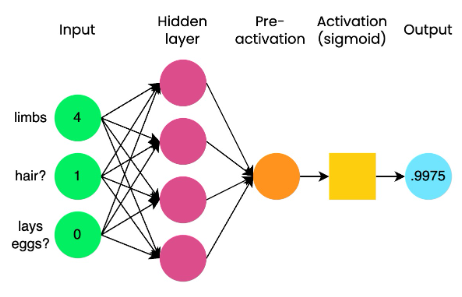

In [33]:
input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()

output = sigmoid(input_tensor)
output

tensor([[0.9975]])

`Note:` Adding sigmoid as the last function in a network of linear layers will make the network behave the same as traditional logistic regression model.<br>
Example -

In [34]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
  (2): Sigmoid()
)

Let us try and add a **Softmax Activation Function** to the following network, where we have a multi-class classification task to predict weather the input features describes a bird(0), a mammal(1) or a reptile(2).

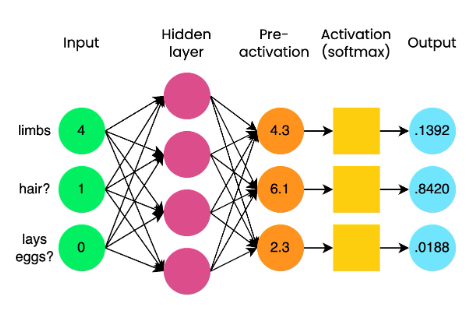

In [36]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

# dim = -1 indicates that softmax function will only be applied to the last layer of the network.
probabilities = nn.Softmax(dim = -1)

output_tensor = probabilities(input_tensor)
output_tensor

tensor([[0.1392, 0.8420, 0.0188]])

`Note:` Softmax can also be used as the last step in Sequential

In [37]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 3),
    nn.Softmax(dim = -1)
)

model

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
  (2): Softmax(dim=None)
)

---

#### **Forward Pass**

To train and predict, the model relies on a forward pass where input data is passed forward through the network, while computations are being performed on the input data at each layer and the output of which is passed on to the subsequent layer. The output of final layer, the prediction, can be binary classification, multi-class classification or regression values.

`-` Demonstrating a binary classification forward pass -

In [ ]:
input_data = torch.tensor(
    [[-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -1.9520, -0.3398] ,
    [0.7406, 1.6763, -3.8511, 0.2432, 0.1123, -0.0633] ,
    [-1.6630, -0.0718, -3.1285, 0.5396, -0.0288, -0.8622] ,
    [-0.7413, 1.7920, -3.0883, -0.6685, 0.4745, -0.4245]]
)

# Defining network architecture
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
output

tensor([[0.6138],
        [0.5630],
        [0.4191],
        [0.6442],
        [0.5451]], grad_fn=<SigmoidBackward0>)

`-` Demonstrating a multi-class classification forward pass -

In [ ]:
# Specifying the no. of classes
n_classes = 3

# Defining network architecture
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, n_classes),
    nn.Softmax(dim = -1)
)

output = model(input_data)
output, output.shape

(tensor([[0.1792, 0.2801, 0.5407],
         [0.2747, 0.1831, 0.5422],
         [0.3915, 0.1074, 0.5011],
         [0.3497, 0.1187, 0.5315],
         [0.3526, 0.1279, 0.5195]], grad_fn=<SoftmaxBackward0>),
 torch.Size([5, 3]))

`-` Demonstrating a regression forward pass -

In [ ]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1)
)

output = model(input_data)
output

tensor([[ 0.2785],
        [ 0.3427],
        [-0.1249],
        [ 0.1024],
        [ 0.2021]], grad_fn=<AddmmBackward0>)

#### **Importing Libraries**

In [31]:
import torch
import torch.nn as nn
from torch import tensor

#### **One-Hot Encoding** 

In multi-class classification, we can use one-hot encoding concept to separate the classes.<br>
Let's say the ground truth is `y = 0` and number of classes = `3`, then,

`->` for `y = 0`, the one-hot encoded values will be 

class              |  0  |  1  |  2  |
|---|--|--|--|
one-hot encoding   |  1  |  0  |  0  |

`->` for `y = 1`, the one-hot encoded values will be 
class              |  0  |  1  |  2  |
|---|--|--|--|
one-hot encoding   |  0  |  1  |  0  |

`->` for `y = 2`, the one-hot encoded values will be 
class              |  0  |  1  |  2  |
|---|--|--|--|
one-hot encoding   |  0  |  0  |  1  |

<br>

Implementing One-hot encoding using `torch.nn.functional` to transform the true label into tensor of zeros and ones.

In [32]:
import torch.nn.functional as F

F.one_hot(tensor(0), num_classes = 3)

tensor([1, 0, 0])

In [33]:
F.one_hot(tensor(1), num_classes = 3)

tensor([0, 1, 0])

In [34]:
F.one_hot(tensor(2), num_classes = 3)

tensor([0, 0, 1])

#### **Cross Entropy Loss Function**

For classification problems, cross entropy loss function is the most widely used loss function.

In [35]:
from torch.nn import CrossEntropyLoss

scores = tensor([[-0.1211, 0.1059]])
one_hot_target = tensor([[1, 0]])

criterion = CrossEntropyLoss()
criterion(scores.double(), one_hot_target.double())
# We use .double() to ensure that the dtype of the passed parameters is in accordance to the one used by CrossEntropyLoss function

tensor(0.8131, dtype=torch.float64)

_The output shown above is the loss value._
<br><br>

`->` Loss Function performs the following -
1. It takes in the model predictions before the final softmax function
2. It also takes in the one hot encoded ground truth label
3. It outputs a single float value, which is our loss value.

Our goal in training a nn is to minimize the loss, and this is how we calculate it using Cross Entropy function, one of the many loss functions.

---

We **Calculate Derivatives (Gradients)** to update model parameters and minimize the loss

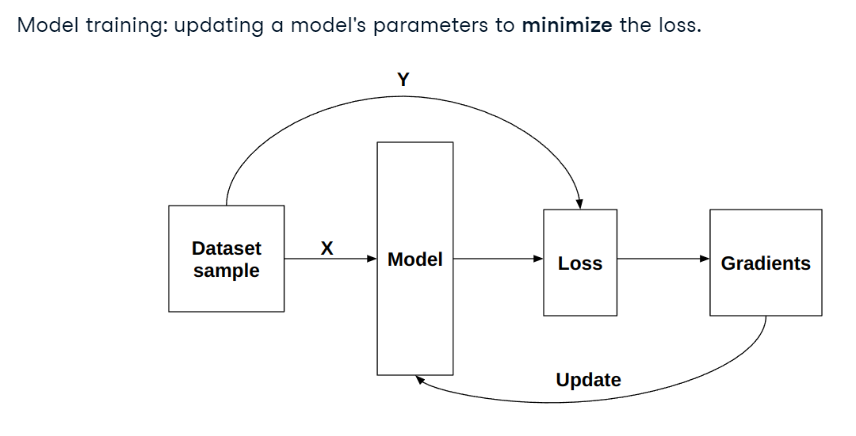

#### **Backpropagation Concept**

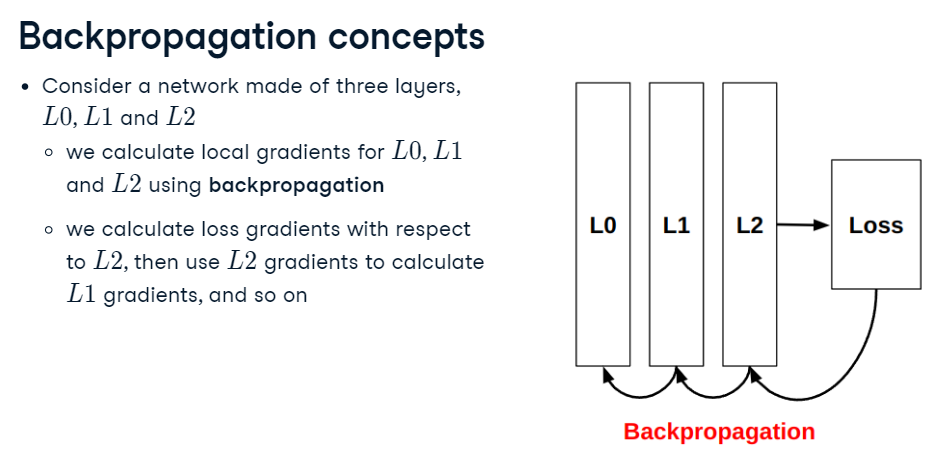

#### **Backpropagation in PyTorch**

In [41]:
sample = tensor([[-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946, -0.9155, -0.0475, -1.3645, 0.6336]])

target = F.one_hot(tensor([1]), num_classes=2)

model = nn.Sequential(
    nn.Linear(10, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

prediction = model(sample)
prediction

tensor([[-0.4998, -0.2265]], grad_fn=<AddmmBackward0>)

In [42]:
criterion = CrossEntropyLoss()
loss = criterion(prediction.double(), target.double())
loss.backward()

In [46]:
# Accessing each layer's gradients 
# Layer 1
model[0].weight.grad, model[0].bias.grad

(tensor([[-0.0280,  0.0963,  0.1306, -0.0231,  0.0297,  0.0060, -0.0580, -0.0030,
          -0.0865,  0.0401],
         [-0.0196,  0.0675,  0.0915, -0.0162,  0.0208,  0.0042, -0.0406, -0.0021,
          -0.0606,  0.0281],
         [ 0.0489, -0.1684, -0.2282,  0.0404, -0.0519, -0.0105,  0.1014,  0.0053,
           0.1511, -0.0702],
         [-0.0338,  0.1161,  0.1574, -0.0278,  0.0358,  0.0072, -0.0699, -0.0036,
          -0.1042,  0.0484],
         [ 0.0352, -0.1212, -0.1643,  0.0291, -0.0374, -0.0075,  0.0730,  0.0038,
           0.1088, -0.0505],
         [-0.0646,  0.2221,  0.3010, -0.0533,  0.0685,  0.0138, -0.1337, -0.0069,
          -0.1993,  0.0925],
         [-0.0034,  0.0116,  0.0157, -0.0028,  0.0036,  0.0007, -0.0070, -0.0004,
          -0.0104,  0.0048],
         [-0.0296,  0.1019,  0.1380, -0.0244,  0.0314,  0.0063, -0.0613, -0.0032,
          -0.0914,  0.0424]]),
 tensor([ 0.0634,  0.0444, -0.1107,  0.0764, -0.0797,  0.1461,  0.0076,  0.0670]))

In [47]:
# Accessing each layer's gradients 
# Layer 2
model[1].weight.grad, model[1].bias.grad

(tensor([[ 0.0680, -0.0454,  0.0652,  0.1239, -0.3329,  0.2052,  0.1261,  0.0950],
         [-0.0690,  0.0461, -0.0662, -0.1259,  0.3382, -0.2084, -0.1281, -0.0965],
         [ 0.0658, -0.0439,  0.0631,  0.1200, -0.3223,  0.1986,  0.1221,  0.0920],
         [ 0.0270, -0.0180,  0.0259,  0.0493, -0.1323,  0.0815,  0.0501,  0.0378]]),
 tensor([-0.2973,  0.3021, -0.2879, -0.1182]))

Updating model parameters (weight & bias updation)

`Note -` parameter updation happens automatically in pytorch.

But, if done manually, it would look like -

```py
lr = 0.001

# updating the weights
weight = model[0].weight
weight_grad = model.weight.grad
weight = weight - lr * weight_grad

# updating the bias
bias = model[0].bias
bias_grad = model.bias.grad
bias = bias - lr * bias_grad
```

Let us take a look at convex and non-convex functions.

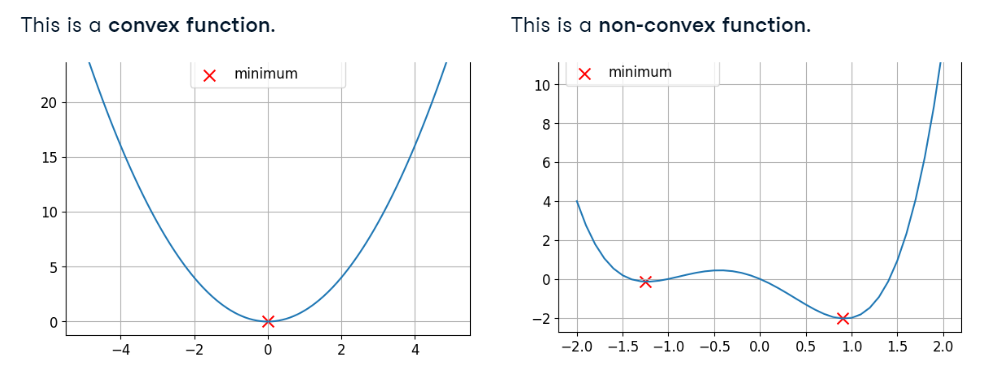

A Convex function only has one minimum called global minimums.<br>
A non-convex function has many minimums called local minimums.

Loss functions in pytorch are non-convex. To find global minima, we use gradient descent.

Gradient Descent algorithms are present in pytorch as optimizers. we can import them using `imoprt torch.optim`. There are many optimizers to choose from, depending on the nature of our loss function.

In [49]:
import torch.optim as optim

# let us try using Stochastic Gradient Descent (SGD)
# model.parameters() returns an iterable of all model parameters.
optimizer = optim.SGD(model.parameters(), lr = 0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

We then use `optimizer.step()` function to update model parameters after calculation of local gradients.

In [50]:
optimizer.step()

In [ ]:
# Merging two ipynb notebooks
# !nbmerge basic_nn.ipynb customizing_nn.ipynb > pytorch_basics.ipynb